In [1]:
Corr_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/obiwan_corr/corr_output/'
fn1 = 'eBOSS_ELG_full_ALL_v4_chunk22_cutted_obiwan.out'
fn2 = 'eBOSS_ELG_full_ALL_v4_chunk22_cutted_uniform.out'
fn3 = 'obiwan_rands.out'
fn4 = 'gaussian_rands.out'
fn5 = 'ransack.out'
fn6 = 'sim_rands.out'

In [2]:
%pylab inline
import matplotlib.pyplot as plt
def corr_plot(Corr_dir,*argv,title = 'eboss ELG'):
        fns = []
        for arg in argv:
            fns.append(arg)
        for fn in fns:
            dat = np.loadtxt(Corr_dir+fn).transpose()
            plt.errorbar(dat[0],dat[1]*dat[0],dat[0]*dat[2],label = fn[:-4])
        plt.gca().set_xscale("log", nonposx='clip')
        zeros = np.zeros(len(dat[0]))
        #plt.errorbar(dat[0],dat[1]*dat[0],dat[0]*dat[2])
        plt.legend()
        plt.plot(dat[0],zeros,'b--')
        plt.xlabel(r'$\theta$'+'(Degree)')
        plt.ylabel(r'$\theta$'+'*w('+r'$\theta$'+')')
        plt.title(title)
        
def corr_plot_natural(Corr_dir,*argv,title = 'eboss ELG'):
        fns = []
        for arg in argv:
            fns.append(arg)
        for fn in fns:
            dat = np.loadtxt(Corr_dir+fn).transpose()
            plt.errorbar(dat[0],dat[1]*dat[0],dat[0]*dat[2],label = fn[:-4])
        plt.legend()
        plt.xlabel(r'$\theta$'+'(Degree)')
        plt.ylabel(r'$\theta$'+'*w('+r'$\theta$'+')')
        plt.title(title)

Populating the interactive namespace from numpy and matplotlib


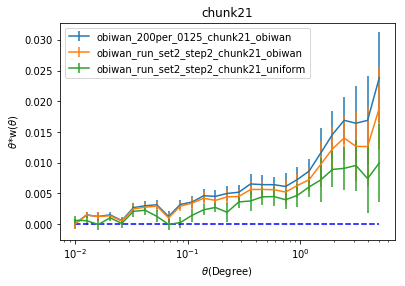

In [29]:
fn_obiwan_chunk21 = 'obiwan_200per_0125_chunk21_obiwan.out'
fn99 = 'obiwan_run_set2_step2_chunk21_obiwan.out'
fn100 = 'obiwan_run_set2_step2_chunk21_uniform.out'

corr_plot(Corr_dir,fn_obiwan_chunk21,fn99,fn100,title = 'chunk21')

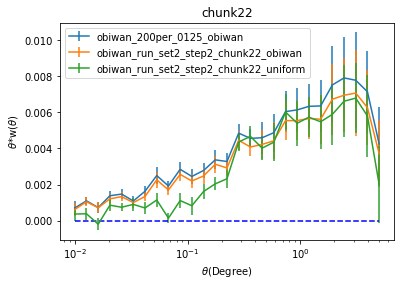

In [28]:
fn_obiwan_chunk22 = 'obiwan_200per_0125_obiwan.out'
fn99 = 'obiwan_run_set2_step2_chunk22_obiwan.out'
fn100 = 'obiwan_run_set2_step2_chunk22_uniform.out'
corr_plot(Corr_dir,fn_obiwan_chunk22,fn99,f100,title='chunk22')

In [16]:
corr_plot(Corr_dir,fn3,fn99,fn100)

NameError: name 'fn100' is not defined

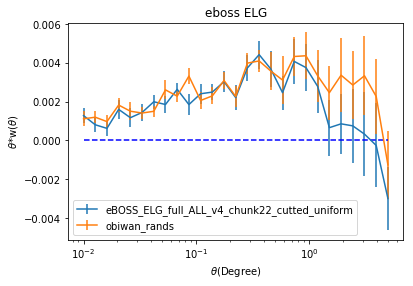

In [126]:
fn7='eBOSS_ELG_full_ALL_v4_chunk22_cutted_uniform.out'
corr_plot(Corr_dir,fn7,fn3)

In [83]:
fn_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn_obiwan = fn_dir+'random_subset_dr3_200per_chunk22.fits'
fn_sim = fn_dir+'sim_randoms_gaussian_really_masked.fits'
fn_dat = fn_dir+'eBOSS_ELG_full_ALL_v4.dat_chunk22_cutted.fits'
fn_dat5 = fn_dir+'eBOSS_ELG_full_ALL_v4.ran.fits'
fn_TS = fn_dir+'ELG_TS_master_cutted.fits'

In [1]:
import healpy as hp
import astropy.io.fits as fits
import numpy as np
fn_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn_obiwan = fn_dir+'random_subset_dr3_200per_chunk22.fits'
fn_sim = fn_dir+'sim_randoms_gaussian_really_masked.fits'
fn_dat = fn_dir+'eBOSS_ELG_full_ALL_v4.dat_chunk22_cutted.fits'


pixs = hp.ang2pix(64,obiwan['ra'],obiwan['dec'],nest = True, lonlat = True)
N = 12*64**2
for i in range(len(pixs)):
    n = pixs[i]
    hist[n]+=1
    
ra,dec = hp.pix2ang(64,np.arange(N), nest = True,lonlat = True)
lists = zip(ra,dec,hist)
col1 = fits.Column(name = 'ra', array = ra, format = 'D')
col2 = fits.Column(name = 'dec', array = dec, format = 'D')
col3 = fits.Column(name = 'num', array = hist, format = 'D')
dat = fits.BinTableHDU.from_columns([col1,col2,col3]).data
sel = dat['num']
sel_num = sel>0
final = dat[sel_num]
dat = fits.BinTableHDU.from_columns(fit.ColDefs(np.array(final))).writeto('./tmp.fits')

ModuleNotFoundError: No module named 'healpy'

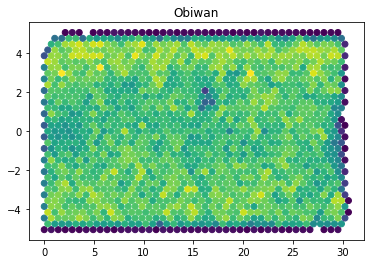

In [107]:
dat = fits.open('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/more/scatter_plot/tmp.fits')[1].data
num = dat['num']/dat['num'].max()
plt.scatter(dat['ra'],dat['dec'],c=num)
plt.title('Obiwan')

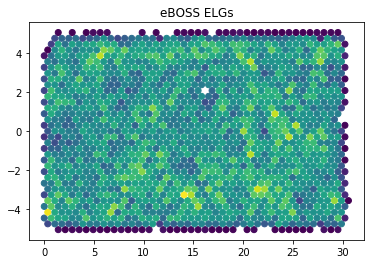

In [106]:
dat = fits.open('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/more/scatter_plot/tmp1.fits')[1].data
num = dat['num']/dat['num'].max()
plt.scatter(dat['ra'],dat['dec'],c=dat['num'])
plt.title('eBOSS ELGs')

In [84]:
import astropy.io.fits as fits
obiwan = fits.open(fn_obiwan)[1].data
sim = fits.open(fn_sim)[1].data
dat = fits.open(fn_dat)[1].data
dat5 = fits.open(fn_dat5)[1].data
dat_TS = fits.open(fn_TS)[1].data

In [85]:
len(dat),len(dat_TS)

(68674, 68729)

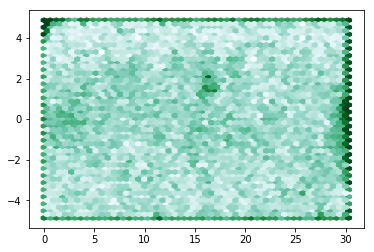

In [66]:
plt.gca().hexbin(obiwan['ra'],obiwan['dec'], gridsize=50, cmap=plt.cm.BuGn_r)

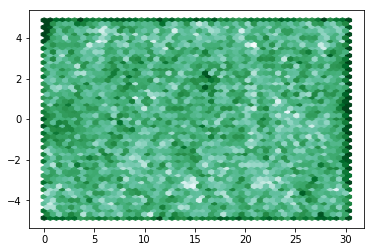

In [67]:
plt.gca().hexbin(dat['ra'],dat['dec'], gridsize=50, cmap=plt.cm.BuGn_r)

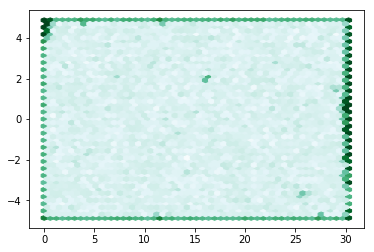

In [69]:
plt.gca().hexbin(sim['ra'],sim['dec'], gridsize=50, cmap=plt.cm.BuGn_r)

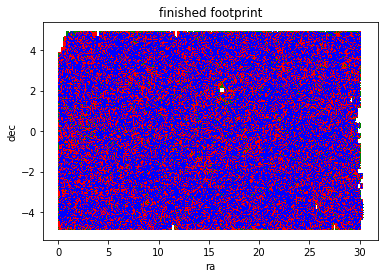

In [29]:
plt.plot(sim['ra'],sim['dec'],'g,')
plt.plot(obiwan['ra'],obiwan['dec'],'r,')
plt.plot(dat['ra'],dat['dec'],'b,')
plt.title('finished footprint')
plt.xlabel('ra')
plt.ylabel('dec')

(-5, 5)

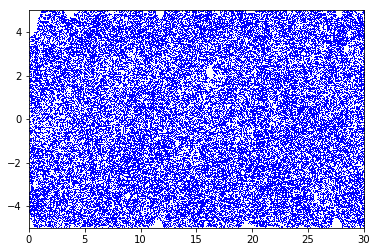

In [37]:
plt.plot(dat5['ra'],dat5['dec'],'b,')
plt.gca().set_xlim((0,30))
plt.gca().set_ylim((-5,5))

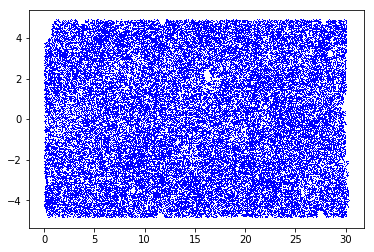

In [38]:
plt.plot(dat['ra'],dat['dec'],'b,')

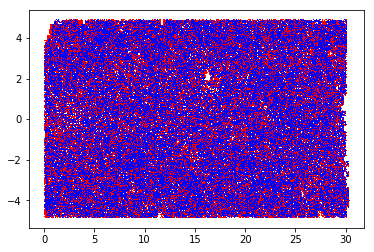

In [44]:
plt.plot(obiwan['ra'],obiwan['dec'],'r,')
plt.plot(dat['ra'],dat['dec'],'b,')

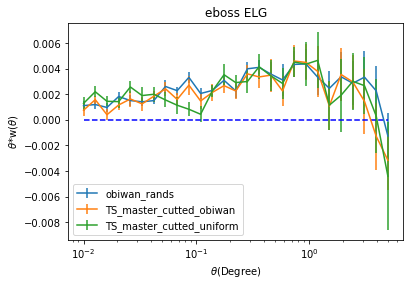

In [55]:
fn7 = 'TS_master_cutted_obiwan.out'
fn8 = 'TS_master_cutted_uniform.out'
corr_plot(Corr_dir,fn3,fn7,fn8)

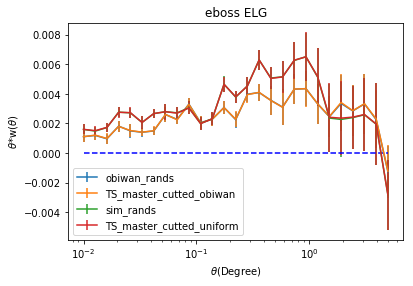

In [87]:
fn9 = 'TS_master_cutted_obiwan.out'
fn10 = 'TS_master_cutted_uniform.out'
corr_plot(Corr_dir,fn3,fn9,fn6,fn10)

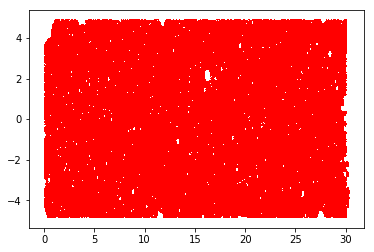

In [110]:
raw_topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
f = raw_topdir + 'ELG.v5_11_0.rrv2.all.rands_cutted.fits'
dat = fits.open(f)[1].data
plt.plot(dat['ra'],dat['dec'],'r,')

20888

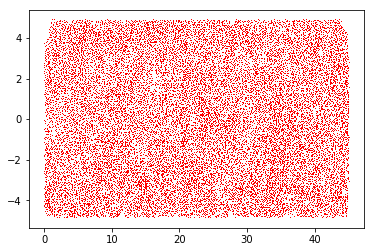

In [7]:
raw_topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
f = raw_topdir + 'ELG_TS_master_cutted_masked_chunk22.fits'
#f = raw_topdir + 'ELG.v5_11_0.rrv2.all.rands.fits'
dat = fits.open(f)[1].data
plt.plot(dat['ra'],dat['dec'],'r,')
len(dat)
#plt.gca().set_xlim((0,30))
#plt.gca().set_ylim((-5,5))

256322

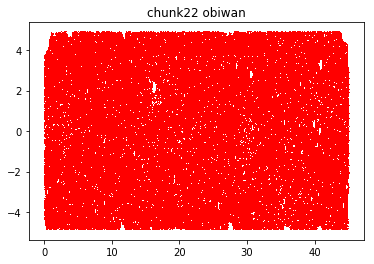

In [10]:
%matplotlib inline
import astropy.io.fits as fits
import matplotlib.pyplot as plt
raw_topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
f = raw_topdir + 'random_subset_dr5_200per_really_masked.fits' #'sim_subset_dr3_200per_cutted.fits'
dat = fits.open(f)[1].data
plt.plot(dat['ra'],dat['dec'],'r,')
plt.title('chunk22 obiwan')
#plt.gca().set_xlim((0,45))
#plt.gca().set_ylim((-5,5))
len(dat)

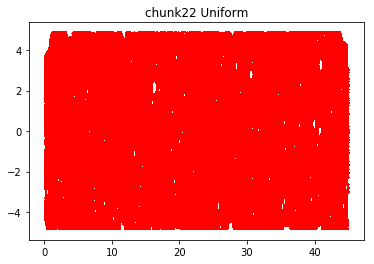

In [11]:
raw_topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
f = raw_topdir + 'sim_subset_dr5_200per_really_masked.fits' #'ELG.v5_11_0.rrv2.all.rands_chunk22_cutted.fits'
dat = fits.open(f)[1].data
plt.plot(dat['ra'],dat['dec'],'r,')
plt.title('chunk22 Uniform')
#plt.gca().set_xlim((0,45))
#plt.gca().set_ylim((-5,5))

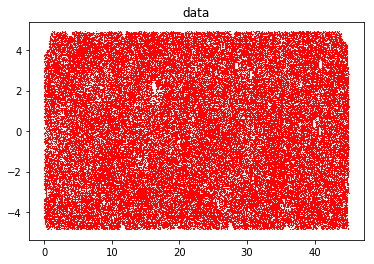

In [9]:
raw_topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
f = raw_topdir + 'eBOSS_ELG_full_ALL_v4.dat_really_masked_cutted.fits' 
#'ELG.v5_11_0.rrv2.all.rands_chunk22_cutted.fits'
dat = fits.open(f)[1].data
plt.plot(dat['ra'],dat['dec'],'r,')
len(dat)
plt.title('data')

104408

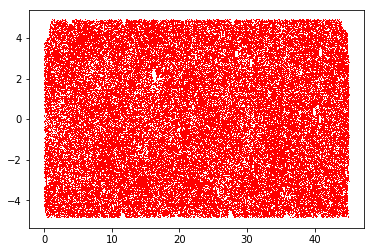

In [30]:
raw_topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
f = raw_topdir + 'ELG_TS_master_really_masked_cutted.fits' 
#'ELG.v5_11_0.rrv2.all.rands_chunk22_cutted.fits'
dat = fits.open(f)[1].data
plt.plot(dat['ra'],dat['dec'],'r,')
len(dat)


73862

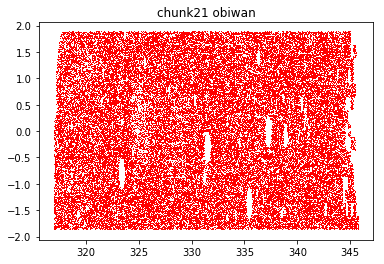

In [12]:
f = raw_topdir + 'random_subset_dr5_200per_really_masked_chunk21.fits' #'sim_subset_dr3_200per_cutted.fits'
dat = fits.open(f)[1].data
plt.plot(dat['ra'],dat['dec'],'r,')
plt.title('chunk21 obiwan')
#plt.gca().set_xlim((0,45))
#plt.gca().set_ylim((-5,5))
len(dat)

246522

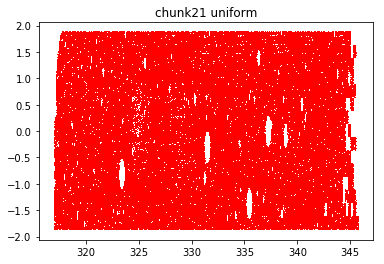

In [16]:
f = raw_topdir + 'sim_subset_dr5_200per_really_masked_chunk21.fits' #'sim_subset_dr3_200per_cutted.fits'
dat = fits.open(f)[1].data
plt.plot(dat['ra'],dat['dec'],'r,')
plt.title('chunk21 uniform')
#plt.gca().set_xlim((0,45))
#plt.gca().set_ylim((-5,5))
len(dat)

25698

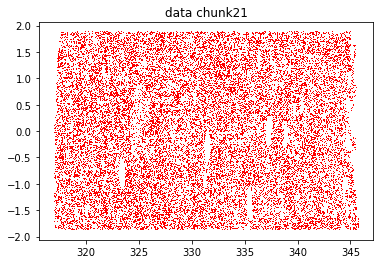

In [17]:
f = raw_topdir + 'eBOSS_ELG_full_ALL_v4.dat_really_masked_chunk21_cutted.fits' 
#'ELG.v5_11_0.rrv2.all.rands_chunk22_cutted.fits'
dat = fits.open(f)[1].data
plt.plot(dat['ra'],dat['dec'],'r,')
plt.title('data chunk21')
len(dat)

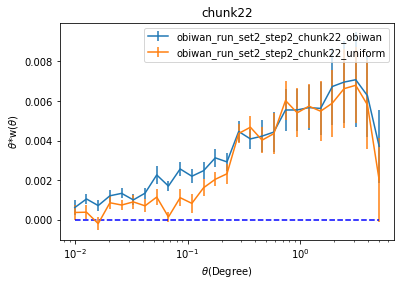

In [21]:
fn99 = 'obiwan_run_set2_step2_chunk22_obiwan.out'
f100 = 'obiwan_run_set2_step2_chunk22_uniform.out'
corr_plot(Corr_dir,fn99,f100,title = 'chunk22')

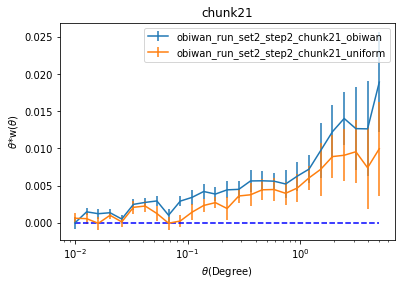

In [14]:
fn99 = 'obiwan_run_set2_step2_chunk21_obiwan.out'
f100 = 'obiwan_run_set2_step2_chunk21_uniform.out'
corr_plot(Corr_dir,fn99,f100,title = 'chunk21')